## Importing the Libraries

In [1]:
## Pandas and Numpy

import pandas as pd
import numpy as np

## Plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

## Ignore warnings

import warnings
warnings.filterwarnings('ignore')

## Stats Libraries

from scipy.stats import zscore

## Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

## Importing the data

In [2]:
df = pd.read_excel('Part2 - Company.xlsx')

## Exploring Shape

df.shape

(61, 5)

In [3]:
## Exploring datatypes and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


## Clustering for imputation

In [4]:
## Scaling the data

dfscaled = df.iloc[:,:-1].apply(zscore)

In [5]:
## importing cdist

from scipy.spatial.distance import cdist

Text(0.5, 1.0, 'Selecting K for K-means with elbow method')

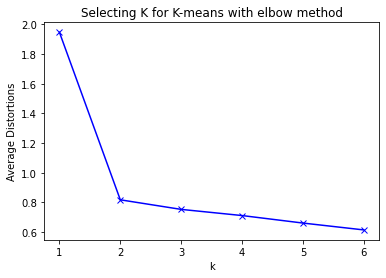

In [6]:
## Identifying ideal number of clusters

clusters = range(1,7)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(dfscaled)
    prediction = model.predict(dfscaled)
    meanDistortions.append(sum(np.min(cdist(dfscaled, model.cluster_centers_, 'euclidean'), axis = 1))/dfscaled.shape[0])
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortions')
plt.title('Selecting K for K-means with elbow method')

From the elbow plot we see that the number of clusters should be 2

In [7]:
## Final clustering model

fin_model = KMeans(2)
fin_model.fit(dfscaled)
prediction = fin_model.predict(dfscaled)

## Append the Clusters

df['Group'] = prediction
dfscaled['Group'] = prediction

In [8]:
## Checking the groups

df[df.Group == 0]

,A,B,C,D,Quality,Group
1,174,133,134,166,Quality B,0
2,159,163,135,131,NaN,0
5,153,140,154,199,NaN,0
7,191,144,143,154,NaN,0
8,160,181,194,178,Quality B,0
9,145,178,158,141,NaN,0
11,138,200,153,192,Quality B,0
14,186,142,146,174,NaN,0
15,196,145,166,132,Quality B,0
18,167,171,163,191,NaN,0


In [9]:
df[df.Group == 1]

,A,B,C,D,Quality,Group
0,47,27,45,108,Quality A,1
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1
6,34,28,78,22,Quality A,1
10,76,94,107,37,Quality A,1
12,27,106,57,37,Quality A,1
13,45,76,56,57,Quality A,1
16,4,61,72,98,Quality A,1
17,96,109,75,34,Quality A,1
21,5,100,32,110,Quality A,1


##### We see that in the cases the where the Quality attribute is present. All wines in Quality A were grouped in cluster 1 and all wines in Quality B were grouped in Cluster 2

##### Therefore we can impute Quality using these clusters

In [10]:
## Imputing data

df.Group = df['Group'].replace(1,'Quality A')
df.Group = df['Group'].replace(0,'Quality B')
df["Quality"] = df['Group']
df = df.drop('Group', axis=1)

In [11]:
print(df.to_string())

      A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
2   159  163  135  131  Quality B
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
5   153  140  154  199  Quality B
6    34   28   78   22  Quality A
7   191  144  143  154  Quality B
8   160  181  194  178  Quality B
9   145  178  158  141  Quality B
10   76   94  107   37  Quality A
11  138  200  153  192  Quality B
12   27  106   57   37  Quality A
13   45   76   56   57  Quality A
14  186  142  146  174  Quality B
15  196  145  166  132  Quality B
16    4   61   72   98  Quality A
17   96  109   75   34  Quality A
18  167  171  163  191  Quality B
19  196  178  165  177  Quality B
20  159  181  142  166  Quality B
21    5  100   32  110  Quality A
22    3   63  109   67  Quality A
23  171  185  181  183  Quality B
24  101  104   95   49  Quality A
25  103   74   59   17  Quality A
26  170  153  181  176  Quality B
27  193  169  199  155  Quality B
28   85   58  